In [1]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from template import save_model

In [2]:
plt.style.use('seaborn')
df = pd.read_csv('../dataset/50_Startups.csv')

In [3]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
state_encod = OneHotEncoder(drop='first')
statedf = pd.DataFrame(state_encod.fit_transform(df[['State']]).toarray(),columns=['state1','state2'])

In [6]:
statedf

,state1,state2
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,0.0,0.0
7,1.0,0.0
8,0.0,1.0
9,0.0,0.0


In [7]:
df = pd.concat([statedf,df],axis=1)
df.drop(['State'],inplace=True, axis=1)

In [8]:
# cleaned
df

,state1,state2,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,166187.94
5,0.0,1.0,131876.90,99814.71,362861.36,156991.12
6,0.0,0.0,134615.46,147198.87,127716.82,156122.51
7,1.0,0.0,130298.13,145530.06,323876.68,155752.60
8,0.0,1.0,120542.52,148718.95,311613.29,152211.77
9,0.0,0.0,123334.88,108679.17,304981.62,149759.96


Implementing Multiple linear regression
    - dividing into x and y
    - split into train and test
    - fit the algo
    - test the algo
    - predict
    - visualize

In [9]:
df.columns.to_list()

['state1',
 'state2',
 'R&D Spend',
 'Administration',
 'Marketing Spend',
 'Profit']

In [10]:
x = df[['state1', 'state2', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]
y = df['Profit']

In [11]:
# scale the value of x

scalerx = StandardScaler()
x = scalerx.fit_transform(x)
print(x[:10]) 

[[-0.68599434  1.39326109  2.01641149  0.56075291  2.15394309  2.01120333]
 [-0.68599434 -0.71774056  1.95586034  1.08280658  1.9236004   1.99942997]
 [ 1.45773797 -0.71774056  1.75436374 -0.72825703  1.62652767  1.98084225]
 [-0.68599434  1.39326109  1.55478369 -0.09636463  1.42221024  1.77662724]
 [ 1.45773797 -0.71774056  1.5049372  -1.07991935  1.28152771  1.35774012]
 [-0.68599434  1.39326109  1.27980001 -0.77623907  1.25421046  1.12724963]
 [-0.68599434 -0.71774056  1.34006641  0.93214721 -0.68814993  1.10548055]
 [ 1.45773797 -0.71774056  1.24505666  0.87198001  0.93218598  1.09620987]
 [-0.68599434  1.39326109  1.03036886  0.9869521   0.83088691  1.00746967]
 [-0.68599434 -0.71774056  1.09181921 -0.45664025  0.77610744  0.94602247]]


In [12]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=2)     # random state doesnt changes the value of prediction score

In [13]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(40, 6) (40,) (10, 6) (10,)


In [14]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [15]:
reg.intercept_

112012.63920000003

In [16]:
reg.coef_

array([-3.05124924e-12, -5.45696821e-12, -8.18545232e-12, -7.16227078e-12,
        0.00000000e+00,  3.99010828e+04])

In [17]:
reg.score(xtest,ytest)

1.0

In [18]:
ypred = reg.predict(x)

In [19]:
df['predicted_profit'] = ypred

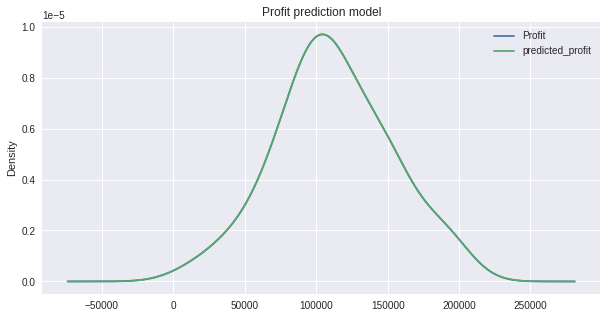

In [20]:
df[['Profit','predicted_profit']].plot(kind='kde',figsize=(10,5),title='Profit prediction model')
plt.show()

In [21]:
model_dict ={
    'state_encoder':state_encod,
    'scaler': scalerx,
    'model' : reg,
    'description' : "startup profit prediction"
}

save_path = '../model/startup_profit_linear.pk'


In [22]:
save_model(model_dict, save_path)

True